	1 
	1 
	1 
	1 
	1 
	1 
object ExperimentControl created.

	1 
	1 
	1 
	0 
xopen("../lib/vector-distance.hoc")
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
Opened. Setting up the cell 

xopen("../lib/cut-sections.hoc")
	1 
xopen("../lib/map-segments-to-3d.hoc")
	1 
xopen("../lib/current-balance.hoc")
	1 
Balancing each compartment to -65 mV


<IPython.core.display.Javascript object>


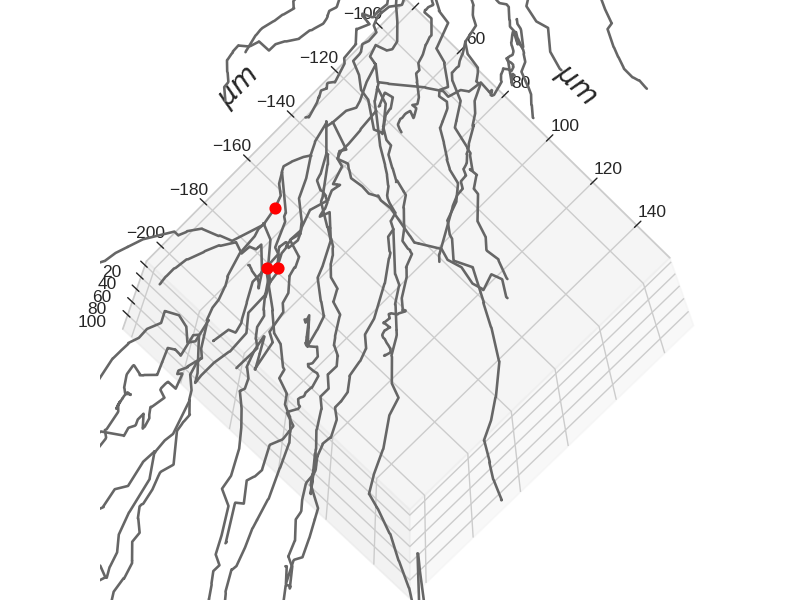

/home/arsentii/.local/lib/python3.8/site-packages/neuron/__init__.py:873: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  line, = self.plot(xs, ys, zs, '-', **kwargs)


Plotting locations of the synapses in the dendritic tree!


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os
import pickle
from instrumentation import *
from hpca_config import *
from Synapse import Synapse
from scipy.integrate import simps
from random import seed, randint
import sys
plt.style.use('seaborn-whitegrid')

# reading value of stimulation period
per = 100
c = 0.3

#-----------------------------------------------------------------------------------
central = [6, 4, 0, 2, 5, 7, 2, 1]
seed(2489)

dt = 0.1
econ = initialize();

distal = [randint(50, 80) for i in range(10)]
Synapse.gmax_AMPA /= len(central)
Synapse.gmax_NMDA /= len(central)

central_synapses = []
for i in central:
    central_synapses.append( Synapse(h.apical_dendrite[i](.5)) )

distal_synapses = []
for i in distal:
    distal_synapses.append( Synapse(h.apical_dendrite[i](.5)) )


Synapse.plot_synapses_locs([central_synapses, distal_synapses], colors=['g', 'r'])
plt.show()

In [ ]:
#---------------------------COUNTER OF AP----------------------------
apc = h.APCount(h.soma[0](.5))
apc.thresh = -15

#---------------------------RUN THE SIMULATION------------------------
run(5000, v_init=-62)
t = np.array(t)
t0 = 100
t1 = 1900
t2 = 2700
t3 = 4500

i_soma = np.array(i_na) + np.array(i_ca) + np.array(i_k)
i_soma0 = i_soma[ np.where(t > t0)[0][0] : np.where(t > t1)[0][0] ]
i_soma1 = i_soma[ np.where(t > t2)[0][0] : np.where(t > t3)[0][0] ]
Q0 = simps(i_soma0, dx=dt) 
Q1 = simps(i_soma1, dx=dt)

print('%s,%s,%s,%s' % (apc.n, Q1/Q0, c, no_pres_ap))